In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# dst=pd.read_csv('train_data/city_A/density.csv',header=None,names=['date','hour','zonex','zoney','dst'])

# tsf=pd.read_csv('train_data/city_A/transfer.csv',header=None,names=['hour','zone1x','zone1y','zone2x','zone2y','tsf'])

# 新增感染人数关键特征值提取，多变量回归建模预测，把A城市建立的模型应用在BCDE上
## 首次出现日期

## 爆发日期（顶点日期）
- 主要和城市有关（一个城市共享一个人口流动控制政策）
- 

## 爆发最高人数（顶点人数）
- 主要和区域附近的人口数量有关
- 以及区域和周边的人员流动

## 爬坡期指数曲线参数
## 下降期指数曲线参数
## 有无二次爆发


有明显的人为控制人口流动的情况；应该把人口流动作为新增感染人数y最主要的预测变量x；

需要根据A城市探究某区域人口流动对新增感染人数的影响因素分析

## 简单的模型

- 二次抛物线拟合参数与区域人口密度、人流量、

# 特征变量提取

# 1 新增感染人数

`df.idxmax()`
Return index of first occurrence of maximum over requested axis.

In [3]:
ifc=pd.read_csv('train_data/city_A/infection.csv',header=None,names=['city','zoneid','date','ifc'])
ifc['date']=pd.to_datetime(ifc['date'],format='%Y%m%d')
ifc=ifc.set_index('date')

In [4]:
ifc.loc[ifc.index.unique()[-3:]].sort_values('ifc')[:15]

,city,zoneid,ifc
date,,,
2120-06-14,A,63,3
2120-06-13,A,4,4
2120-06-14,A,86,4
2120-06-12,A,63,5
2120-06-12,A,4,6
2120-06-12,A,110,7
2120-06-14,A,112,7
2120-06-13,A,63,7
2120-06-14,A,77,9


In [5]:
ifc[ifc.zoneid==63]

,city,zoneid,ifc
date,,,
2120-05-01,A,63,0
2120-05-02,A,63,0
2120-05-03,A,63,0
2120-05-04,A,63,0
2120-05-05,A,63,0
2120-05-06,A,63,0
2120-05-07,A,63,0
2120-05-08,A,63,0
2120-05-09,A,63,0


## 1.1 转折点提取
### 1.1.1 每个区域首例出现日期和新增感染人数
A城市最多的是在5-18出现首例，一般是在18-22这5天内陆续出现

In [6]:
first=ifc.groupby('zoneid').apply(lambda g:(g.ifc>0).idxmax())

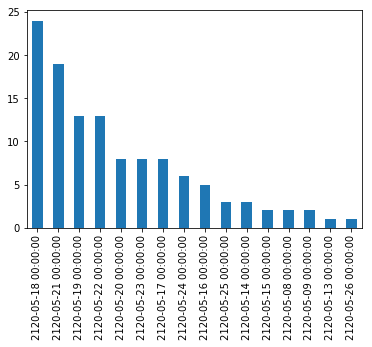

In [7]:
first.value_counts().plot.bar()

In [8]:
first_df=ifc.reset_index().merge(pd.DataFrame(first,columns=['date']).reset_index(),how='inner')
first_df.sort_values('ifc',ascending=False)

,date,city,zoneid,ifc
107,2120-05-22,A,107,31
27,2120-05-24,A,27,27
39,2120-05-15,A,39,25
53,2120-05-14,A,53,18
42,2120-05-18,A,42,17
...,...,...,...,...
74,2120-05-19,A,74,1
82,2120-05-20,A,82,1
86,2120-05-18,A,86,1
87,2120-05-22,A,87,1


### 1.1.2 顶点爆发日期和新增人数
同一个城市，顶点爆发日期非常相近
A城市都集中在6-2这一天，其次是6-1，其他时间爆发都很少

In [9]:
peak=ifc.groupby('zoneid').apply(lambda g:g.ifc.idxmax())

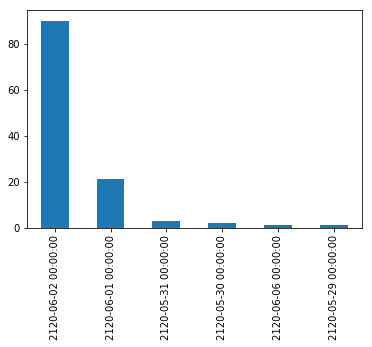

In [10]:
peak.value_counts().plot.bar()

In [11]:
peak_df=ifc.reset_index().merge(pd.DataFrame(peak,columns=['date']).reset_index(),how='inner')

In [12]:
peak_df.sort_values('ifc',ascending=False)

,date,city,zoneid,ifc
39,2120-06-01,A,39,47382
40,2120-06-01,A,40,30581
51,2120-06-01,A,51,18449
65,2120-06-01,A,65,15200
41,2120-06-01,A,41,12427
...,...,...,...,...
100,2120-06-02,A,100,126
85,2120-06-02,A,85,123
5,2120-06-02,A,5,115
95,2120-06-01,A,95,113


#### 1.2.2.1 signal寻找波峰值，分析二次爆发
将最大的两个极大值点作为波峰值，第二个是第二次爆发点

In [13]:
from scipy import signal

peaks=ifc.groupby('zoneid').apply(lambda g:g.iloc[signal.find_peaks(g.ifc)[0]]).drop(columns='zoneid').reset_index()
peaks=peaks.groupby('zoneid').apply(lambda g:g.sort_values('ifc',ascending=False)[:2]).drop(columns='zoneid').reset_index()[['date','city','zoneid','ifc']]

### 1.2.3 合并转折点表: 区域编号,首例日期,顶点日期

In [14]:
pts=pd.concat([first,peak],axis=1)
pts.columns=['frst','peak']
pts['days']=pts.peak-pts.frst
pts.sort_values('days',ascending=False)

,frst,peak,days
zoneid,,,
52,2120-05-08,2120-06-02,25 days
43,2120-05-09,2120-06-02,24 days
40,2120-05-08,2120-06-01,24 days
44,2120-05-09,2120-06-02,24 days
18,2120-05-13,2120-06-02,20 days
...,...,...,...
97,2120-05-24,2120-06-02,9 days
115,2120-05-25,2120-06-02,8 days
59,2120-05-25,2120-06-02,8 days


In [15]:
pts.days.value_counts() # A城市爬坡阶段持续大约10-15天

15 days    22
11 days    17
14 days    14
12 days    13
13 days    11
10 days    10
16 days     9
9 days      7
24 days     3
17 days     3
8 days      3
18 days     2
20 days     1
25 days     1
7 days      1
19 days     1
Name: days, dtype: int64

## 1.2 曲线拟合参数提取

### 1.2.0 曲线拟合教程

#### 1.2.0.1 多项式拟合

           4           3        2
-0.001105 x + 0.07939 x - 1.57 x + 9.096 x - 8.273


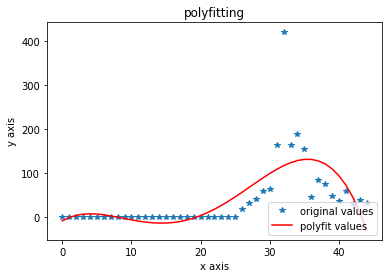

In [16]:
x=np.arange(45)
y=ifc[ifc.zoneid==0].ifc.values
z1 = np.polyfit(x, y, 4) # 用k次多项式拟合
p1 = np.poly1d(z1) #多项式系数

print(p1)

yvals=p1(x) 

plt.plot(x, y, '*',label='original values')
plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc=4)
plt.title('polyfitting')
plt.show()

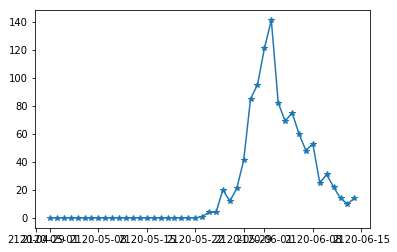

In [17]:
plt.plot(ifc[ifc.zoneid==3].ifc,'*-')

#### 1.2.0.2 指数拟合

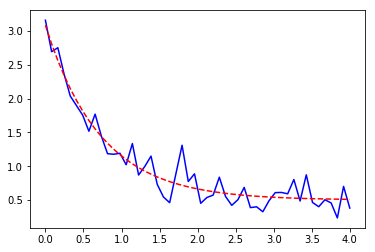

In [18]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
 
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))
plt.plot(xdata,ydata,'b-')
popt, pcov = curve_fit(func, xdata, ydata)
#popt数组中，三个值分别是待求参数a,b,c
y2 = [func(i, popt[0],popt[1],popt[2]) for i in xdata]
plt.plot(xdata,y2,'r--')

### 1.2.1 爬坡/增长/上升期曲线 指数拟合

### $y=ae^{bx}+c$

x是从0开始的序列，表示天数

In [19]:
# 截取提取每个城市从初例到顶峰之间的曲线up_curve(uc)
uc=ifc.groupby('zoneid').apply(lambda g:g[(g.index>=pts.loc[g.zoneid[0],'frst'])&(g.index<=pts.loc[g.zoneid[0],'peak'])])
uc=uc.drop(columns='zoneid').reset_index().set_index('date')

array([  25.71589807,    0.36983968, -107.84283301])

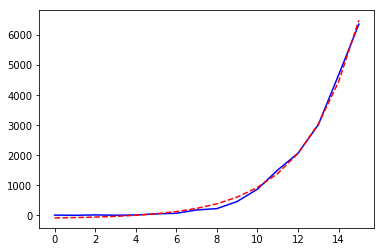

In [20]:
ts=uc[uc.zoneid==68].ifc
def func_u(x, a, b, c):
    return a * np.exp(b * x) + c
x=np.arange(len(ts))
y=ts.values
plt.plot(x,y,'b-')
popt, pcov = curve_fit(func_u, x, y)
#popt数组中，三个值分别是待求参数a,b,c
y2 = [func_u(i, *popt) for i in x]
plt.plot(x,y2,'r--')
popt

In [21]:
def func_u(x, a, b, c):
    return a * np.exp(b * x) + c
def exp_fit_forecast(zoneid):
    ts=uc[uc.zoneid==zoneid].ifc
    n=len(ts)
    y=ts.values
    x=np.arange(len(ts))# x是从0开始的序列，表示经过的天数
    popt, pcov = curve_fit(func_u, x, y) 
    y_fit = [int(func_u(i, *popt)) for i in range(n)]
    dt = pd.date_range(start=ts.index[0], periods=len(ts), freq="D")
    sr=pd.Series(y_fit,index=dt)
    sr[sr<0]=0
    return sr,popt

uc_pred=pd.DataFrame([])
uc_para=np.array([])
for zoneid in range(118):
    df,para=exp_fit_forecast(zoneid)
    df=df.reset_index()
    uc_para=np.append(uc_para,para)
    df.columns=['date','ifc_pred']
    df['zoneid']=zoneid
    uc_pred=uc_pred.append(df)
uc_pred=uc_pred.set_index('date')
uc_para=pd.DataFrame(uc_para.reshape([-1,3])).reset_index()
uc_para.columns=['zoneid','uc_a','uc_b','uc_c']

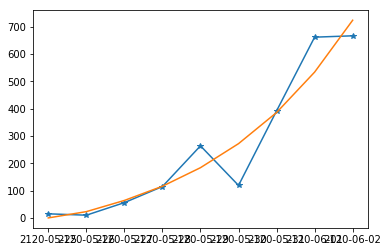

In [22]:
# 查看某一个区域
zoneid=58
ts=uc[uc.zoneid==zoneid].ifc
plt.plot(ts,'-*')
plt.plot(uc_pred[uc_pred.zoneid==zoneid].ifc_pred)

### 1.2.2 下降/衰退期曲线 指数拟合

In [23]:
# 截取提取每个城市从顶峰到训练集最后一天之间的曲线down_curve(dc)
dc=ifc.groupby('zoneid').apply(lambda g:g[g.index>=pts.loc[g.zoneid[0],'peak']])
dc=dc.drop(columns='zoneid').reset_index().set_index('date')

#### 1.2.2.1 对A城市所有站点进行指数拟合并预测后30天（包含峰值点）

### $y=ae^{b/x}+c$

x是从1开始的序列，表示经过的天数

In [24]:
def func_d(x, a, b, c):
        return a * np.exp(b /x) + c
def exp_fit_forecast(zoneid):
    ts=dc[dc.zoneid==zoneid].ifc
    n=len(ts)
    y=ts.values
    x=np.arange(1,len(ts)+1) # x是从1开始的序列，表示经过的天数
    popt, pcov = curve_fit(func_d, x, y, maxfev = 10000)
    y_fit = [int(func_d(i, *popt)) for i in range(1,n+31)]
    dt = pd.date_range(start=ts.index[0], periods=n+30, freq="D")
    sr=pd.Series(y_fit,index=dt)
    sr[sr<0]=0
    return sr,popt

dc_pred=pd.DataFrame([])
dc_para=np.array([])
for zoneid in range(118):
    df,para=exp_fit_forecast(zoneid)
    df=df.reset_index()
    dc_para=np.append(dc_para,para)
    df.columns=['date','ifc_pred']
    df['zoneid']=zoneid
    dc_pred=dc_pred.append(df)
dc_pred=dc_pred.set_index('date')
dc_para=pd.DataFrame(dc_para.reshape([-1,3])).reset_index()
dc_para.columns=['zoneid','dc_a','dc_b','dc_c']

D:\python\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


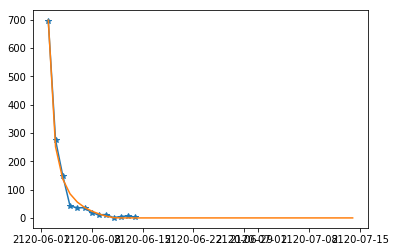

In [25]:
# 查看某一个区域
zoneid=63
ts=dc[dc.zoneid==zoneid].ifc
plt.plot(ts,'-*')
plt.plot(dc_pred[dc_pred.zoneid==zoneid].ifc_pred)

#### 1.2.2.2 从峰值点后一天（锐减之后），采用一次线性拟合，分析斜率

### $y=a+bx$

In [26]:
# 截取提取每个城市从顶峰到训练集最后一天之间的曲线down_curve(dc1) (不包含顶峰值)
dc1=ifc.groupby('zoneid').apply(lambda g:g[g.index>pts.loc[g.zoneid[0],'peak']])
dc1=dc1.drop(columns='zoneid').reset_index().set_index('date')

In [27]:
# 衰减尾部线性拟合
def linear_fit_forecast(zoneid):
    ts=dc1[dc1.zoneid==zoneid].ifc
    n=len(ts)
    y=ts.values
    x=np.arange(n)
    z1 = np.polyfit(x, y, 1) # 用1次多项式拟合，即线性回归（x是天数）
    p1 = np.poly1d(z1) #1次多项式系数，截距，斜率
    x_fit=np.arange(n+30)
    y_fit=p1(x_fit)
    dt = pd.date_range(start=ts.index[0], periods=len(ts)+30, freq="D")
    sr = pd.Series(y_fit,index=dt)
    sr[sr<0]=0
    return sr.astype(int),p1[1]

In [28]:
# 批量预测 储存数据
dc1_pred=pd.DataFrame([])
dc1_para=np.array([])
for zoneid in range(118):
    df,para=linear_fit_forecast(zoneid)
    df=df.reset_index()
    dc1_para=np.append(dc1_para,para)
    df.columns=['date','ifc_pred']
    df['zoneid']=zoneid
    dc1_pred=dc1_pred.append(df)
dc1_pred=dc1_pred.set_index('date')
dc1_para=pd.DataFrame(dc1_para.reshape([-1,1])).reset_index()
dc1_para.columns=['zoneid','dc_slope']

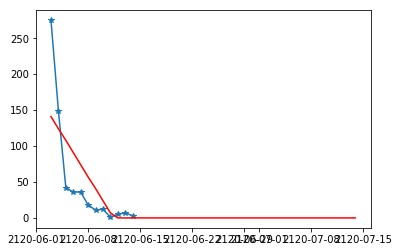

In [29]:
# 查看某一个区域
zoneid=63
ts=dc1[dc1.zoneid==zoneid].ifc
plt.plot(ts,'-*',label='original values')
plt.plot(dc1_pred[dc1_pred.zoneid==zoneid].ifc_pred,'r',label='polyfit values')

## 1.3 汇总结果

### 1.3.1 区域新增感染人数信息

In [30]:
first_df1=first_df.rename(columns={'ifc':'ifc_init','date':'date_init'})
peak_df1=peak_df.rename(columns={'ifc':'ifc_peak','date':'date_peak'})
# 高峰日紧接着后一天，新增感染人数的，骤降人数
sag_df=pd.DataFrame(ifc.groupby('zoneid').apply(lambda d:d.sort_index().ifc.diff(-1)).unstack()).reset_index().merge(peak_df).rename(columns={0:'ifc_sag'})[['zoneid','ifc_sag']]

In [31]:
# 合并
zone_a_ifc=peak_df1.merge(first_df1).merge(sag_df).merge(uc_para).merge(dc_para).merge(dc1_para)

In [32]:
zone_a_ifc['days_up']=(zone_a_ifc.date_peak-zone_a_ifc.date_init).dt.days

In [33]:
zone_a_ifc['date_init_rank']=(zone_a_ifc['date_init']-zone_a_ifc['date_init'].min()).dt.days

In [34]:
zone_a_ifc=zone_a_ifc[['city','zoneid', # 城市，区域id
                       'date_init','ifc_init','days_up','date_init_rank', # 首例日期，首例人数，爬坡阶段天数
                       'date_peak','ifc_peak','ifc_sag', # 高峰日期，高峰人数，高峰日后一天内骤降人数
                       'uc_a', 'uc_b', 'uc_c', # 爬坡上升期曲线指数拟合参数
                       'dc_a', 'dc_b', 'dc_c', 'dc_slope']] # 衰退下降期曲线指数拟合参数；一次线性回归下降斜率

-----

In [40]:
def zone_cent(city):
    # 读取初始文件
    zone0=pd.read_csv('train_data/city_%s/grid_attr.csv'%city,header=None,names=['zonex','zoney','zoneid'])
    # 按照区域id分组，因为一个区域的所有点构成简单的矩形，所以求矩形的形心点作为区域中心
    zone1=zone0.groupby('zoneid').apply(lambda g:[(g.zonex.max()+g.zonex.min())/2,(g.zoney.max()+g.zoney.min())/2])
    zone1=pd.DataFrame(zip(*zone1)).T.reset_index()
    zone1.columns=['zoneid','zonex','zoney']
    zone1['city']=city
    return zone1

In [41]:
zone_a_cent=zone_cent('A')

In [42]:
zone_a_info=zone_a_cent.merge(zone_a_ifc)

In [43]:
zone_a_info.to_csv('src/zone_a_info.csv',index=False)

In [44]:
zone_a_info.describe().T

,count,mean,std,min,25%,50%,75%,max
zoneid,118.0,5.850000e+01,3.420770e+01,0.000000e+00,2.925000e+01,58.500000,8.775000e+01,1.170000e+02
zonex,118.0,1.472413e+02,9.381374e-02,1.467658e+02,1.471970e+02,147.241912,1.472869e+02,1.474306e+02
zoney,118.0,3.028112e+01,6.204749e-02,3.007101e+01,3.024240e+01,30.304461,3.032062e+01,3.039820e+01
ifc_init,118.0,5.016949e+00,5.273678e+00,1.000000e+00,2.000000e+00,3.000000,6.750000e+00,3.100000e+01
days_up,118.0,1.333051e+01,3.273972e+00,7.000000e+00,1.100000e+01,13.000000,1.500000e+01,2.500000e+01
date_init_rank,118.0,1.138983e+01,3.338544e+00,0.000000e+00,1.000000e+01,11.000000,1.400000e+01,1.800000e+01
ifc_peak,118.0,2.586339e+03,5.748749e+03,1.080000e+02,3.370000e+02,783.500000,2.127500e+03,4.738200e+04
ifc_sag,118.0,7.985254e+02,1.079569e+03,0.000000e+00,1.405000e+02,337.500000,9.710000e+02,4.588000e+03
uc_a,118.0,5.998577e+01,1.049564e+02,3.009138e-01,1.173506e+01,28.885998,7.004268e+01,8.328699e+02
uc_b,118.0,2.796547e-01,1.029675e-01,7.884564e-02,2.252385e-01,0.272693,3.223444e-01,1.026193e+00


# 2 人口密度

In [45]:
from shapely.geometry import Point # 将pd数据（csv）转为gpd（shp）数据
import geopandas as gpd

In [46]:
def df2gdf(df,x_name,y_name):
    
    '''
    将pd数据（csv）转为gpd（shp）数据
    '''
    geometry = [Point(xy) for xy in zip(df[x_name], df[y_name])]
    df = df.drop([x_name,y_name], axis=1)
    crs = {'init': 'epsg:4326'}
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return gdf

## 2.1 监测站分区：提取zone的形心作为区域代表点

In [47]:
zone0=pd.read_csv('train_data/city_A/grid_attr.csv',header=None,names=['zonex','zoney','zoneid'])

In [48]:
zone0.to_csv('src/zone_a_grid.csv',index=False)

In [49]:
def zone_cent(city):
    zone0=pd.read_csv('train_data/city_%s/grid_attr.csv'%city,header=None,names=['zonex','zoney','zoneid'])
    zone1=zone0.groupby('zoneid').apply(lambda g:[(g.zonex.max()+g.zonex.min())/2,(g.zoney.max()+g.zoney.min())/2])
    zone1=pd.DataFrame(zip(*zone1)).T.reset_index()
    zone1.columns=['zoneid','zonex','zoney']
    zone1['city']=city
    return zone1

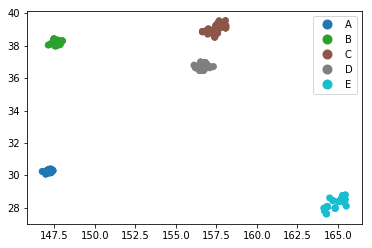

In [50]:
zone=pd.DataFrame([])
for city in list('ABCDE'):
    zone1=zone_cent(city)
    zone=zone.append(zone1)
df2gdf(zone,'zonex','zoney').plot(column='city',legend=True)

# 3 城市内人口转移

# @@@ RMSLE评分机制
在peak处还是在衰减尾部的影响更大？

均方根对数误差 root mean squared logarithmic error
$$\sqrt{\frac{1}{n}\sum_{i=1}^n (log(p_i+1)-log(a_i+1))^2}$$

$$(log(p_i+1)-log(a_i+1))^2=(log(\frac{p_i+1}{a_i+1}))^2$$

$n$ total number of observations

$p_i$ prediction

$a_i$ actual value

In [51]:
from math import log
def rmsle_part(p,a):
    return pow(log(p+1)-log(a+1),2)
rmsle_part_np=np.vectorize(rmsle_part)

In [52]:
rmsle_part(0,1)

0.4804530139182014

In [53]:
rmsle_part(10000,5000)

0.4803144152702719

In [54]:
rmsle_part(10,100)

4.916087782821049

In [55]:
rmsle_part(90,100)

0.010870358273866714

In [56]:
rmsle_part(10,0)

5.749901739308773

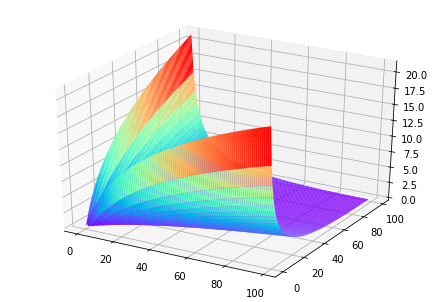

In [57]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X=np.arange(0,100)
Y=np.arange(0,100)
X, Y = np.meshgrid(X, Y)
R = rmsle_part_np(X,Y)
Z = R
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
 
plt.draw()
plt.pause(10)
plt.savefig('src/3D.jpg')
plt.close()